[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ishandandekar/USA-accidents-analysis/blob/main/analysis.ipynb)

# USA Traffic Accident Dataset(2016 - 2021)
The dataset contains around 2.8 million records. It has records from  49 states out of 52 of U.S.A. The dataset was found on [Kaggle](https://www.kaggle.com/sobhanmoosavi/us-accidents). The dataset has been collected real-time, using multiple traffic APIs. Currently, it contains accident data collected from February 2016 to Dec 2020 for the Contiguous United States.

<img style="float:center" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ1KOKtLhXAyfBDdGKnk07pRlAORftxLGIcow&usqp=CAU" alt="accident image" style="width:435px;height:366px;">

## Getting the data
The data is available on [Kaggle](https://www.kaggle.com/sobhanmoosavi/us-accidents). Although, I have used the `opendatasets` library to get the dataset on local machine. The library uses the Kaggle API key to download the dataset.

In [5]:
# Uncomment the below line and run the cell to install opendatasets library
# !pip install opendatasets --upgrade --quiet

In [6]:
import pandas as pd
import plotly.express as px
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', category=FutureWarning)
sns.set_style('darkgrid')

URL = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

# Make sure to add the kaggle.json file, which has the username and API key in the same directory as the notebook
od.download(URL)

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


## Data Preparation and cleaning
TODO:
* Load the dataset using pandas
* Check if the datatypes of columns are correct i.e. represent the column correctly
* Fix missing/incorrect values

In [7]:
# This path is relative from the folder
FILE_PATH=r'us-accidents\US_Accidents_Dec21_updated.csv'
df=pd.read_csv(FILE_PATH,index_col=0)

# Peek the first 10 rows of data
df.head(10)
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (2845342, 46)


In [8]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2845342 entries, A-1 to A-2845342
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   End_Time               object 
 3   Start_Lat              float64
 4   Start_Lng              float64
 5   End_Lat                float64
 6   End_Lng                float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Number                 float64
 10  Street                 object 
 11  Side                   object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)        

In [9]:
# Check statistical measures of the columns
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [10]:
# Number of numerical columns
dtypes = ['int16','int32','int64','float16','float32','float64']
print(f"Number of numeric columns: {len(df.select_dtypes(include=dtypes).columns)}")

Number of numeric columns: 14


In [11]:
print(f"Total number of NA values: {df.isna().sum().sum()}")

Total number of NA values: 3414349


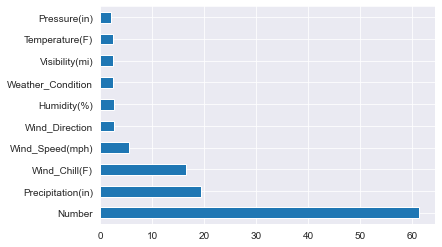

In [12]:
# Percentage of missing values
na_percent = df.isna().sum().sort_values(ascending=False)*100/len(df)
na_percent.head(10).plot(kind='barh');

## Data exploration and visualization
TODO:
* Analyse columns:
    - City
    - State
    - Start time
    - Start Lat, Start Lng
    - Temprature
    - Weather condition
    - Severity
* Summarize observations

In [13]:
# Columns in the dataframe
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

**City**

In [14]:
# Unique number of cities in the dataframe
print(f"Number of unique cities: {df.City.nunique()}")

Number of unique cities: 11681


In [15]:
# Most number of accidents reported (sorted by city)
cities_sorted = df.City.value_counts()
cities_sorted

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [16]:
# Does New York show up in the data?
"New York" in df.City

False

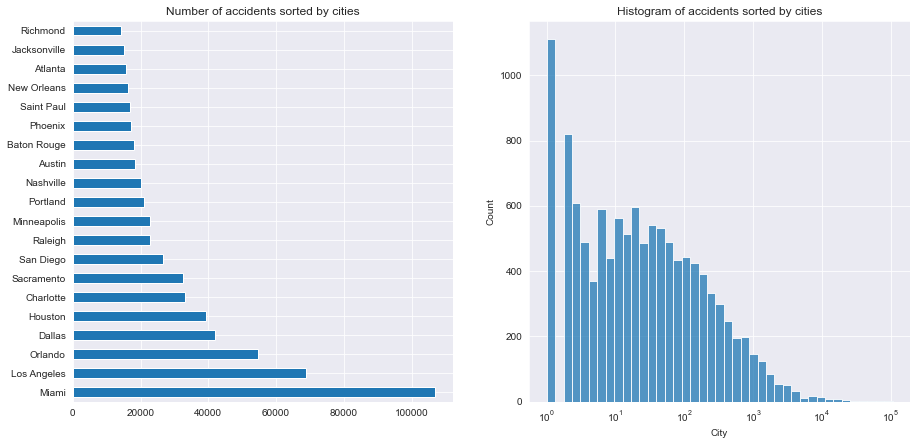

In [17]:
# Plot 20 of cities sorted
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
cities_sorted[:20].plot(kind='barh');
plt.title("Number of accidents sorted by cities")
plt.subplot(1,2,2)
sns.histplot(cities_sorted,log_scale=True)
plt.title("Histogram of accidents sorted by cities");

**State**

In [18]:
# Choropleth map of number of accidents categorised by states
states_choropleth=px.choropleth(data_frame=df,locations=df.State.value_counts().index,locationmode='USA-states',color=df.State.value_counts().array,color_continuous_scale='Aggrnyl',scope='usa',basemap_visible=False,title='Heatmpap of accidents over USA')
states_choropleth.update_layout(paper_bgcolor='#ffffff',showlegend=False, title_x=0.5)
states_choropleth.show()

**Start Time**

In [19]:
# View first 8 rows of the column
df.Start_Time.head(8)

ID
A-1    2016-02-08 00:37:08
A-2    2016-02-08 05:56:20
A-3    2016-02-08 06:15:39
A-4    2016-02-08 06:51:45
A-5    2016-02-08 07:53:43
A-6    2016-02-08 08:16:57
A-7    2016-02-08 08:15:41
A-8    2016-02-08 11:51:46
Name: Start_Time, dtype: object

In [20]:
# Change dataype from object to datetime format
df.Start_Time=pd.to_datetime(df.Start_Time)

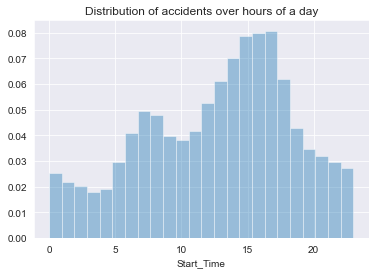

In [21]:
# Distibution of the hour value
plt.title("Distribution of accidents over hours of a day")
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True);

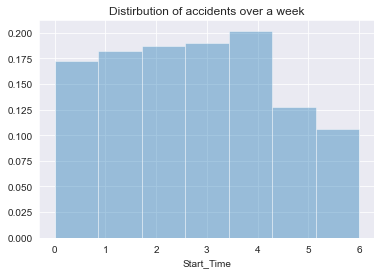

In [22]:
# Distribution of the count of accidents over day of the week
plt.title("Distirbution of accidents over a week")
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True);

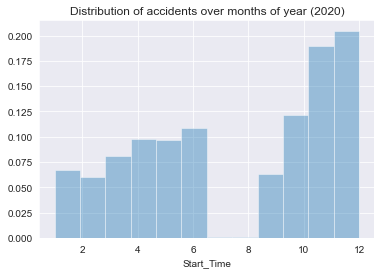

In [23]:
# Distribution of accidents over year
df_2020 = df[df['Start_Time'].dt.year == 2020]
sns.distplot(df_2020.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
plt.title("Distribution of accidents over months of year (2020)");

In [24]:
df.Start_Time.dt.year.value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64

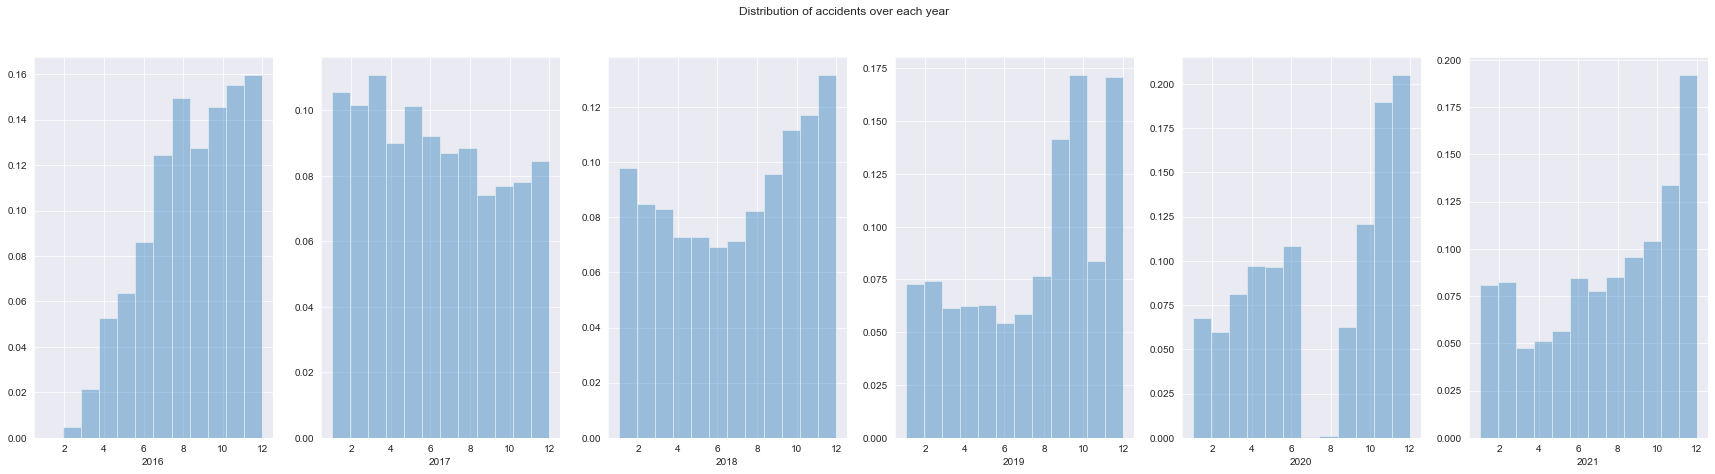

In [25]:
plt.figure(figsize=(30,7))
plt.subplot(1,6,1)
sns.distplot(df[df['Start_Time'].dt.year == 2016].Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
plt.xlabel("2016")
plt.subplot(1,6,2)
sns.distplot(df[df['Start_Time'].dt.year == 2017].Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
plt.xlabel("2017")
plt.subplot(1,6,3)
sns.distplot(df[df['Start_Time'].dt.year == 2018].Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
plt.xlabel("2018")
plt.subplot(1,6,4)
sns.distplot(df[df['Start_Time'].dt.year == 2019].Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
plt.xlabel("2019")
plt.subplot(1,6,5)
sns.distplot(df[df['Start_Time'].dt.year == 2020].Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
plt.xlabel("2020")
plt.subplot(1,6,6)
sns.distplot(df[df['Start_Time'].dt.year == 2021].Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
plt.xlabel("2021")
plt.suptitle(f"Distribution of accidents over each year");

**Start longitude and latitude**

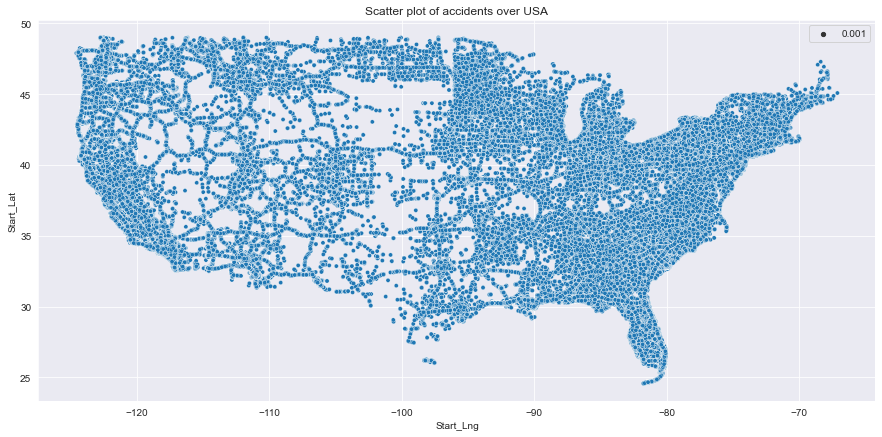

In [26]:
# Scatter plot to visualize the areas
plt.figure(figsize=(15,7))
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,size=0.001)
plt.title("Scatter plot of accidents over USA");

**Severity**

In [27]:
df.Severity.value_counts()

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

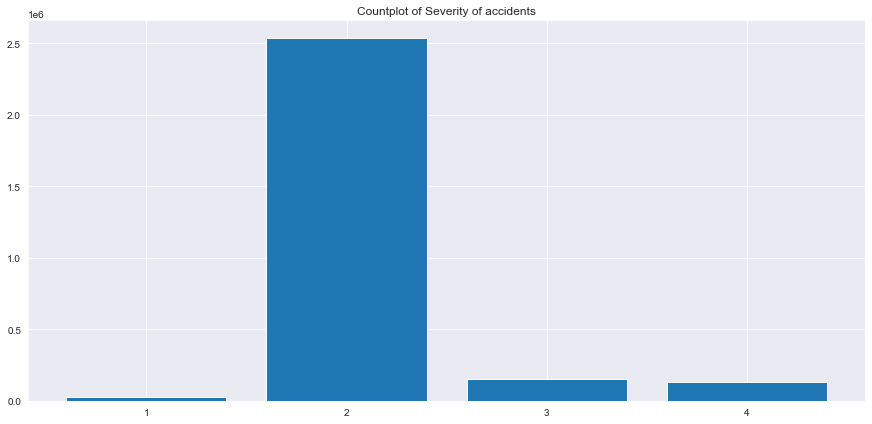

In [28]:
# Severity of accidents
plt.figure(figsize=(15,7))
plt.bar(x=df.Severity.value_counts().index,height=df.Severity.value_counts().values)
plt.xticks(df.Severity.value_counts().index)
plt.title("Countplot of Severity of accidents");

**Weather condition**

In [29]:
# Count of accidents sorted with weather condition
weather_fig=px.bar(data_frame=df.Weather_Condition.value_counts().sort_values(ascending=False).head(10),orientation='v',template='simple_white',labels={"index":"Weather conditions","value":"Number of accidents"},title="Bar chart of accidents according to Weather conditions",color_discrete_sequence=["#03ef62"])
weather_fig.update_layout(paper_bgcolor='#ffffff',showlegend=False, title_x=0.5)
weather_fig.show()

### Summary and Conclusion
1. There is no data about New York
1. Around 1000 cities have reported only 1 accidents
1. Los Angeles has the most number of deaths followed by Miami and Charlotte
1. State of California has almost thrice the number of deaths than its successor Florida
1. A high percentage of accidents happen between 3pm to 5pm maybe because the people who work in the day return during that time
1. Most number of accidents have happened in the weekdays and there are less number of accidents in weekends which I found very odd
1. Data is missing for the year 2020
1. Although the number of accidents were pretty consistent thorughtout the rest of the years
1. A large number of accidents have been classified with severity of 2, this also depends on the rules which are being used or modified to classify these accidents
1. Less number of accidents have happened in foggy and cloudy conditions.